https://ldjwj.github.io/ML_Basic_Class/part03_ml/ch02_01_01_knn_code.html

In [1]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib


In [2]:


path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
!pip install mglearn

In [4]:
import mglearn #저자가 책을 위해서 만든 라이브러리 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

### regression

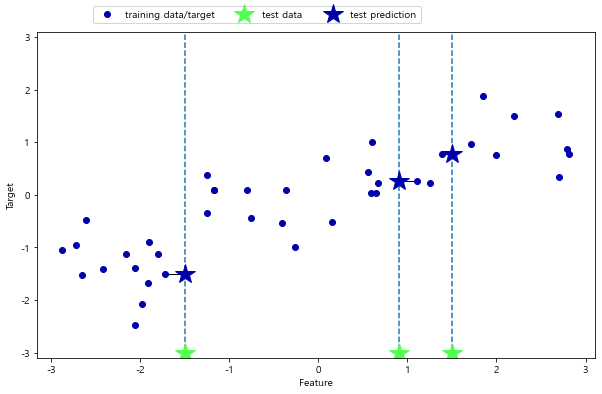

In [5]:
#k가 1일때 
mglearn.plots.plot_knn_regression(n_neighbors=1)


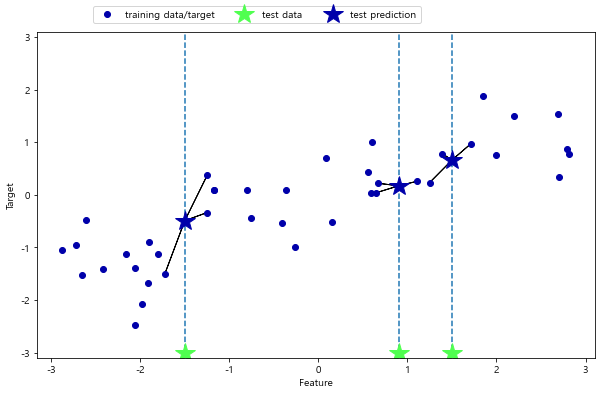

In [6]:
#k가 3일때 

mglearn.plots.plot_knn_regression(n_neighbors=3)



#별: 세개의 값의 평균값 

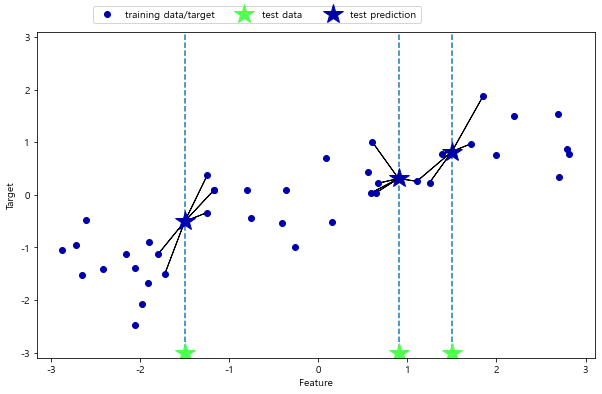

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

### (분류- 범주형 값의 예측)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


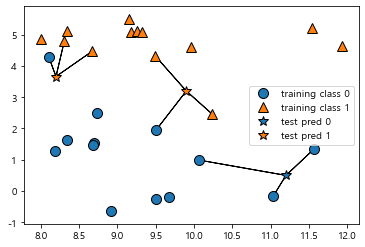

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### 03 유방암 데이터 셋 실습

In [9]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [10]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 행열 : (569, 30)


In [11]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


### 데이터 나누기

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                         stratify=cancer.target,     
                                         random_state=77) #

In [14]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 
y_train_1 = (y_train == 1).sum()
y_train_0 = len(y_train) - (y_train == 1).sum()

y_test_1 = (y_test == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print( "y_train y_test => 1의 개수, 1의 개수", y_train_1, y_test_1 )
print( "y_train y_test => 0의 개수, 0의 개수", y_train_0, y_test_0)

## target의 확인
print( "1: y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_1, y_test_1,
                                            y_train_1/y_1_all, y_test_1/y_1_all) )

print( "0 :y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_0, y_test_0,
                                            y_train_0/y_0_all, y_test_0/y_0_all) )

426
y_train y_test => 1의 개수, 1의 개수 267 90
y_train y_test => 0의 개수, 0의 개수 159 53
1: y_train:267, y_test:90, 비율 0.7478991596638656, 0.25210084033613445
0 :y_train:159, y_test:53, 비율 0.75, 0.25


### 모델만들기

In [15]:
from sklearn.neighbors import KNeighborsClassifier  #사이즈니까 classifier

In [16]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [17]:
# 정확도 구하기
(pred == y_test).sum()/(len(pred))

0.9090909090909091

### score: 평가
* 정확도
* 결정계수

In [18]:
acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
acc_tr, acc_test

(0.9553990610328639, 0.9090909090909091)

In [19]:
print("k : {}".format(3))
print("훈련 데이터셋 정확도 : {:.2f}".format(acc_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(acc_test))

k : 3
훈련 데이터셋 정확도 : 0.96
테스트 데이터 셋 정확도 : 0.91


In [20]:
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)# 1,3,5~21

for n in k_nums:
    # 모델 선택 및 학습 
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기 
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )

k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.888
k :  3
학습용셋 정확도 0.955
테스트용셋 정확도 0.909
k :  5
학습용셋 정확도 0.953
테스트용셋 정확도 0.916
k :  7
학습용셋 정확도 0.953
테스트용셋 정확도 0.909
k :  9
학습용셋 정확도 0.946
테스트용셋 정확도 0.909
k :  11
학습용셋 정확도 0.939
테스트용셋 정확도 0.909
k :  13
학습용셋 정확도 0.937
테스트용셋 정확도 0.916
k :  15
학습용셋 정확도 0.939
테스트용셋 정확도 0.916
k :  17
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  19
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  21
학습용셋 정확도 0.934
테스트용셋 정확도 0.923


In [21]:
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)   # 1,3,5..
for n in k_nums:
   
   # print(n)
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
   
   # 정확도
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    tr_acc.append(acc_tr)   #tr_acc = [] 리스트에  acc_tr을 append
    test_acc.append(acc_test)  #test_acc = [] 리스트에 acc_test을 append
    
    # print("k = ", n, f"score : {acc_tr}, score: {acc_test}" )
    print("k = %2d  score : %10f, score: %10f" % (n, acc_tr, acc_test) )

k =  1  score :   1.000000, score:   0.888112
k =  3  score :   0.955399, score:   0.909091
k =  5  score :   0.953052, score:   0.916084
k =  7  score :   0.953052, score:   0.909091
k =  9  score :   0.946009, score:   0.909091
k = 11  score :   0.938967, score:   0.909091
k = 13  score :   0.936620, score:   0.916084
k = 15  score :   0.938967, score:   0.916084
k = 17  score :   0.934272, score:   0.923077
k = 19  score :   0.936620, score:   0.923077
k = 21  score :   0.934272, score:   0.923077


In [22]:
import seaborn as sns
print(sns.__version__)

0.11.0


In [23]:
# tr_acc = []
# test_acc = []
dat = { "tr_acc":tr_acc, "test_acc":test_acc }
dat_df = pd.DataFrame(dat, index = range(1, 22,2))
dat_df

,tr_acc,test_acc
1,1.000000,0.888112
3,0.955399,0.909091
5,0.953052,0.916084
7,0.953052,0.909091
9,0.946009,0.909091
11,0.938967,0.909091
13,0.936620,0.916084
15,0.938967,0.916084
17,0.934272,0.923077
19,0.936620,0.923077


<AxesSubplot:>

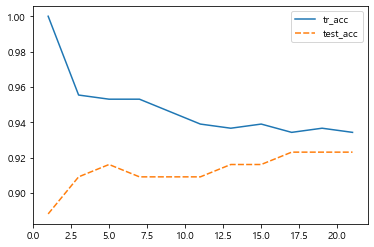

In [24]:
sns.lineplot(data=dat_df)